In [54]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as sts 
import statsmodels.graphics.tsaplots as sgt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Correlation


Correlation measures how strong the ***linear*** relationship between two random variables are. For example, if energy demand goes up as temperature goes up, there is a linear relationship between energy and temperature. If energy goes up by 1 kWh as temperature goes up by 1 degF, there is a perfect linear relationship. Correlation measures how strong the linear relationship is. 
 
Here, note that the slope doesn't matter. No matter how steep the slop is, the correlation is 1 if they move together upwards. 


<img src="images/Correlation_examples2.svg">

The correlation between two variables X and Y can be calculated as below:  
$$
\rho_{X,Y} = \text{corr}(X,Y) = \frac{cov(X, Y)}{\sigma_X \sigma_Y}
$$

With samples, we can estimate covariance and standard deviations as below: 
$$
cov(X, Y) = \frac{\sum_{i=1}^{n} (x_i-\bar{x}){(y_i-\bar{y})}}{(n-1)} \\
\sigma_X = \sqrt{\frac{\sum(x_i - \bar{x})^2}{(n-1)}} \\
\sigma_Y = \sqrt{\frac{\sum(y_i - \bar{y})^2}{(n-1)}}
$$

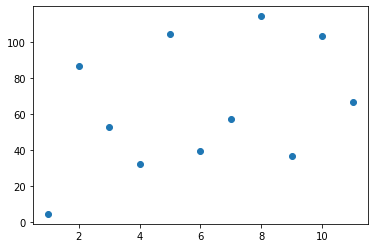

Correlation coefficient: 0.3823241358329392


In [160]:
a = np.arange(1, 12) # np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
b = a * 2 + np.random.random(len(a))*100

plt.scatter(a, b)
plt.show() 

print(f"Correlation coefficient: {np.corrcoef(a, b)[0, 1]}")

# Timeseries

- Series of observations in a regular interval 
- Example: energy demand data, Stock market price, hourly temperature data, etc.
- Often times, the best predictor for timeseries data is previous values in the series. For example, using yesterday's value to predict the today's value. 
- We could use yesterday's value, but why not the day before yesterday? what about three days ago? 
- If there is any pattern in the data, we could determine it easily.

In [81]:
a = np.array([1, 2, 3] * 5)

df = pd.DataFrame({'s': a})
df['s1'] = df['s'].shift(1)
df['s2'] = df['s'].shift(2)
df['s3'] = df['s'].shift(3)

In [82]:
df

,s,s1,s2,s3
0,1,NaN,NaN,NaN
1,2,1.0,NaN,NaN
2,3,2.0,1.0,NaN
3,1,3.0,2.0,1.0
4,2,1.0,3.0,2.0
5,3,2.0,1.0,3.0
6,1,3.0,2.0,1.0
7,2,1.0,3.0,2.0
8,3,2.0,1.0,3.0
9,1,3.0,2.0,1.0


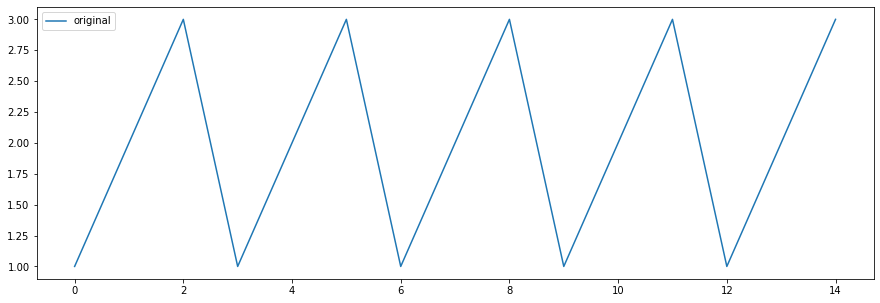

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(df['s'])
plt.legend(['original'])
plt.show()

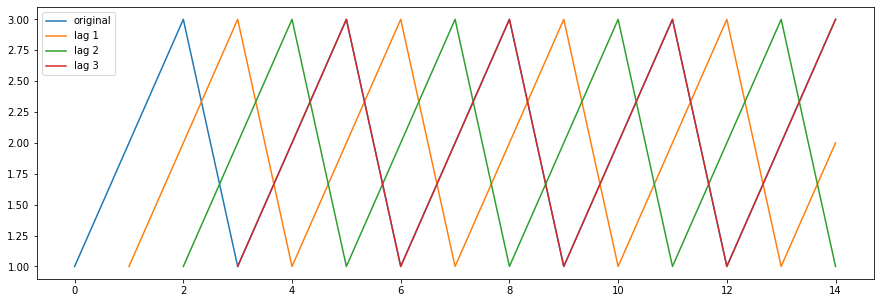

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(df)
plt.legend(['original', 'lag 1', 'lag 2', 'lag 3'])
plt.show()

# Autocorrelation

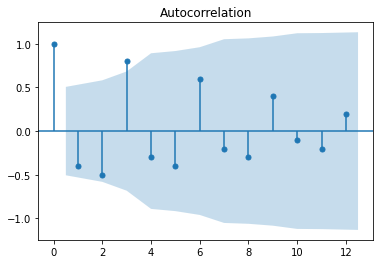

In [138]:
sgt.plot_acf(a)
plt.show()

In [90]:
sts.pacf(a, nlags=6, method='ols')

array([ 1.        , -0.44      , -1.        ,  0.97435897, -0.01298701,
       -0.01315789,  0.49333333])

# Partial Autocorrelation

In [124]:
model = sm.OLS(endog=df.loc[2:, 's'], exog=df.loc[2:, ['s1']])
results = model.fit()
resid0 = results.resid

In [125]:
model = sm.OLS(endog=df.loc[2:, ['s2']], exog=df.loc[2:, ['s1']])
results = model.fit()
resid1 = results.resid

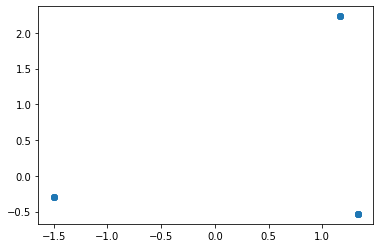

In [127]:
plt.plot(resid0, resid1, 'o')

In [129]:
np.corrcoef(resid0, resid1)

array([[1.        , 0.32230756],
       [0.32230756, 1.        ]])

In [122]:
from sklearn.linear_model import LinearRegression

In [137]:
lm = LinearRegression()
x = df.loc[3:, ['s1', 's2']]
y = df.loc[3:, 's']
model = lm.fit(x, y)
resid0 = y - model.predict(x)

lm = LinearRegression()
x = df.loc[3:, ['s1', 's2']]
y = df.loc[3:, 's3']
model = lm.fit(x, y)
resid1 = y - model.predict(x)

np.corrcoef(resid0, resid1)

array([[1., 1.],
       [1., 1.]])

In [21]:
np.var(a)

0.6666666666666666

In [39]:
m = np.mean(a)
print("mean:", m)

for k in range(1, 2):
    c = 0
    for i in range(len(a)-k):
        s1= (a[i]-m)
        s2 = (a[i+k]-m)
        current = (a[i]-m)*(a[i+k]-m)
        print(f"left: {a[i]}, right: {a[i+k]}, current: {current}")
        c += current 
#     print("Ch:", c/len(a))
    print(f"Ch/C0 at k = {k}:", c/len(a)/np.var(a))

mean: 2.0
left: 1, right: 2, current: -0.0
left: 2, right: 3, current: 0.0
left: 3, right: 1, current: -1.0
left: 1, right: 2, current: -0.0
left: 2, right: 3, current: 0.0
left: 3, right: 1, current: -1.0
left: 1, right: 2, current: -0.0
left: 2, right: 3, current: 0.0
Ch/C0 at k = 1: -0.3333333333333333
